# Scikit learn

tutorial homepage
https://scikit-learn.org/stable/tutorial/index.html

supervised learning page
https://scikit-learn.org/stable/supervised_learning.html



##### About SciKit learn

The essence of sciKit learn is to render useable information in the form of predictions from a complex data set. 

The data (or portions of) is taken in by an algorithm selected by the programmer. It is then processed according to the algorithms intrinsic qualitys and from that a prediction can be made as to the identity or value of other data points. This is only when the given inputs are of the same type of inputs used by the algorithm in generating its response to the input and test data.

SciKit learn is based on the python programming language.

###### supervised learning

This is when our data contains the information that we want to predict, the example of the Iris flower data set here is perfect, we have dimentions of the flower and we know already what type of flower they are. Given this information can our algorithm give a good estimate of a flower type when given a set of dimentions without the type. This type of problem is called a classification problem.

Within supervised learning we also have regression problems at its most simple this is prediction of a value based on the supply of a another value or values e.g can we predict the width of a tree trunk given the species and the height of a tree.

###### unsupervised learning

Unsupervised learning is when the data used to train the algorithm does not have a value or feature to train it to. The goal of this learning is to observe trends, clusters, or distibutions and present them as more intuatively understanadable data.

###### A look at a few of the algorithms in sklearn

1. K nearest neighbors regression

###### K nearest neighbors

### Import the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.neighbors as nei
import sklearn.model_selection as mod
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
#Set the graph sizes
plt.rcParams['figure.figsize'] = (15,10)
plt.style.use('ggplot')

###### Import the penguins data set

![penguins](penguins.png)


Thanks to Alison Horst for the penguins image

The penguins in this data set from 3 islands can be male or female and the data was taken over 3 years 2007,2008,2009.

The measurements taken were bill length, bill depth, flipper length all measured in millimeters and weight in gramms.

In [3]:
from palmerpenguins import load_penguins

In [4]:
sns.set_style('whitegrid')
penguins = load_penguins()
# displaying the origional data set
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


###### Looking at the whole data set

Before we begin to clean up and dicect the data set we will take a look at a few plots that allow us to better visualise the data we have been given. We will start with a look at the body mass of the different types.

Text(0, 0.5, 'Body Mass (grams)')

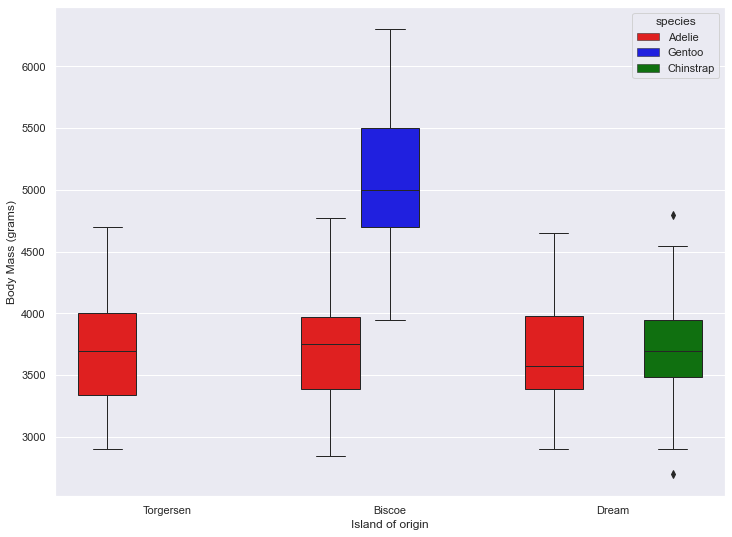

In [5]:
# setting up a box plot to display body mass, location and species
sns.set(rc={'figure.figsize':(12,9)})
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = penguins,
            palette=['red','blue','green'],
            linewidth=1)
g.set_xlabel('Island of origin')
g.set_ylabel('Body Mass (grams)')

The first thing I can see is that the Adelie penguin is the only penguin to inhabit more than 1 island (at least when the data was aquired). The next thing is that the Adelie and the Chinstrap who inhabit Dream whilst they have different box plots they are far more similar on this visualisation than the Gentoo whose weight significantly differs from the Adelie of Biscoe island. there is some overlap on the tails but the main populations of these penguins differgreatly in weight.

Next we will look at the same plot but with respect to flipper length.

Text(0, 0.5, 'Flipper length (millimeters)')

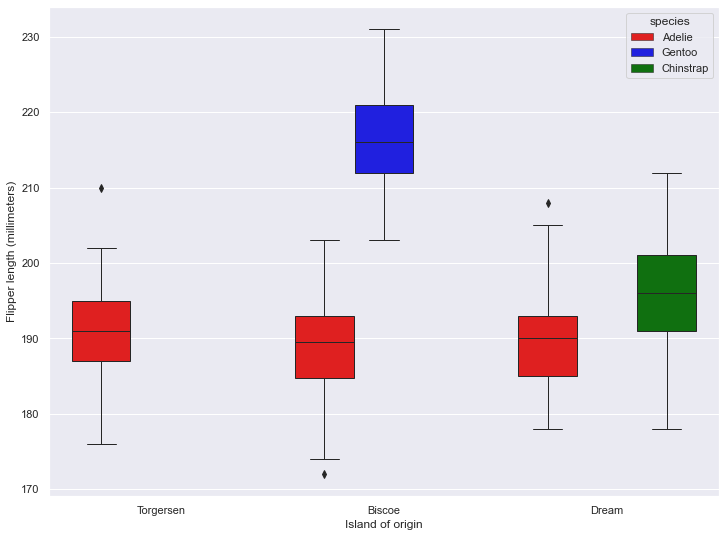

In [6]:
# setting up a box plot to display body mass, location and species
sns.set(rc={'figure.figsize':(12,9)})
g = sns.boxplot(x = 'island',
            y ='flipper_length_mm',
            hue = 'species',
            data = penguins,
            palette=['red','blue','green'],
            linewidth=1)
g.set_xlabel('Island of origin')
g.set_ylabel('Flipper length (millimeters)')

Here we have a much more stark differentiation between the species and to some degree a greater differentiation through the Adelie that inhabit different islands. This would add further weight to the idea that identification using the classification method would be suitable for this data set.

Next we will look at bill length and bill depth.

Text(0, 0.5, 'Bill length (millimeters)')

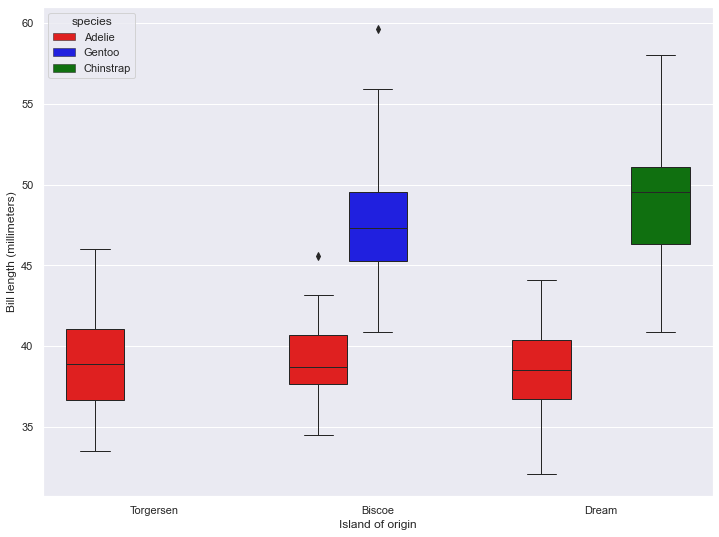

In [7]:
sns.set(rc={'figure.figsize':(12,9)})
g = sns.boxplot(x = 'island',
            y ='bill_length_mm',
            hue = 'species',
            data = penguins,
            palette=['red','blue','green'],
            linewidth=1)
g.set_xlabel('Island of origin')
g.set_ylabel('Bill length (millimeters)')

Text(0, 0.5, 'Bill depth (millimeters)')

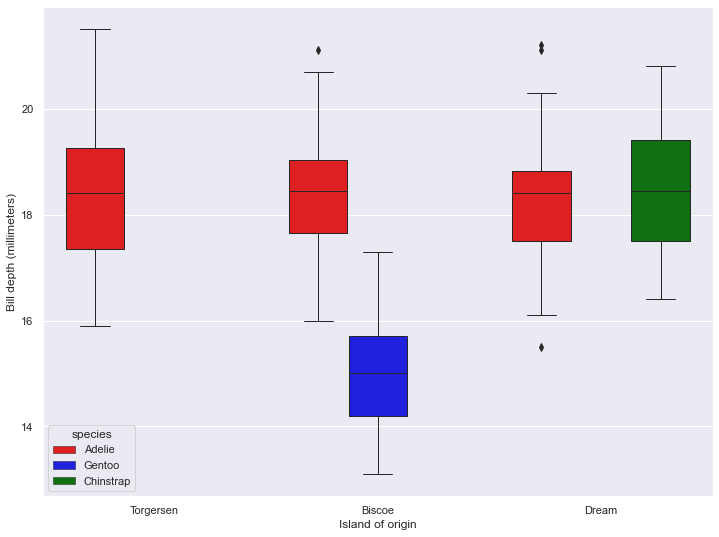

In [8]:
sns.set(rc={'figure.figsize':(12,9)})
g = sns.boxplot(x = 'island',
            y ='bill_depth_mm',
            hue = 'species',
            data = penguins,
            palette=['red','blue','green'],
            linewidth=1)
g.set_xlabel('Island of origin')
g.set_ylabel('Bill depth (millimeters)')

Both bill length and bill depth offer differentiation oportunity again.With Bill length clearly separating the Adelie from the other two and Bill depth separating the Gentoo. The difficulty for this algorithm may we be the determination of origin of the Adelie.

We will take a look at the pair plots for the species before diving into the issue between the Adelie penguin Island origin.

In [9]:
penguins2= penguins[['species','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

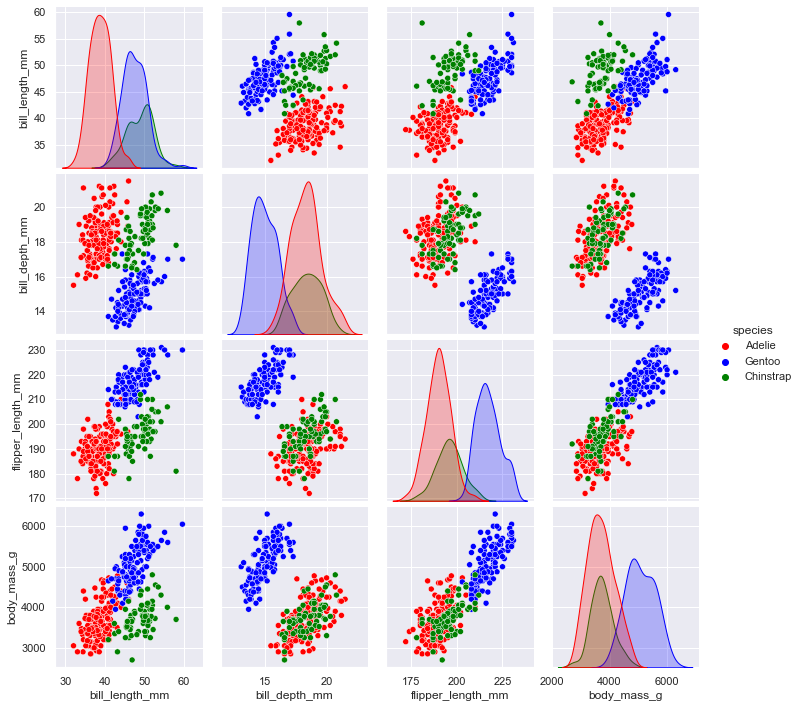

In [10]:
g = sns.pairplot(hue="species",
               data=penguins2,
               palette=['red','blue','green'])

The pair plots above show good grouping of the species as we suspected from the box plots. On some plots the Gentoo(Blue) flipper length/bill_depth, body_mass/bill_depth show a clear differentiation. 

Whilst the Adelie and Chinstrap occupy crossover on more attibutes bill_length still provides a high level of clearance between those two species with bill_length/body_mass and bill_length/bill_depth offering almost a complete separation. As such the application of suitable machine learning package would yield a high degree of success in predicting the correct species using the physical measurements of the penguins only.

In [ ]:
We will now isolate the Adelie penguin and look at it in more detail.

In [27]:
singlepenguin =penguins.loc[penguins.loc[:,'species']== 'Adelie']
singlepenguin1 = singlepenguin[['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
singlepenguin1

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Torgersen,39.1,18.7,181.0,3750.0
1,Torgersen,39.5,17.4,186.0,3800.0
2,Torgersen,40.3,18.0,195.0,3250.0
3,Torgersen,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
147,Dream,36.6,18.4,184.0,3475.0
148,Dream,36.0,17.8,195.0,3450.0
149,Dream,37.8,18.1,193.0,3750.0
150,Dream,36.0,17.1,187.0,3700.0


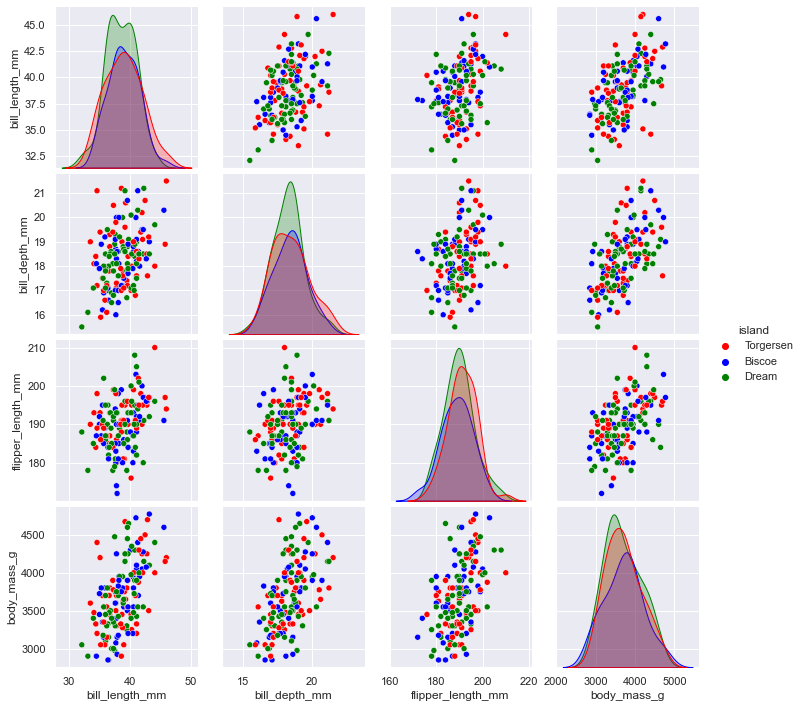

In [12]:
g = sns.pairplot(hue="island",
               data=singlepenguin1,
               palette=['red','blue','green'])

The pair plots for the differnt islands present us a better image to describe what we already knew and that was that the distribtion of the physical characteristics (excluding sex) for the Adelie penguin is in two dimetions not clearly differatiating between islands. It is possible now to dscout linear regression from our potential sources of machine learning. This type of scattered data would yeild very little for a predictive model to gain certainty from.

Just to visually demonstrate this I plotted a performed an lm plot of flipper length against body mass (below) clearly this data is not suitable for linear modeling within the (Adelie) penguin type.

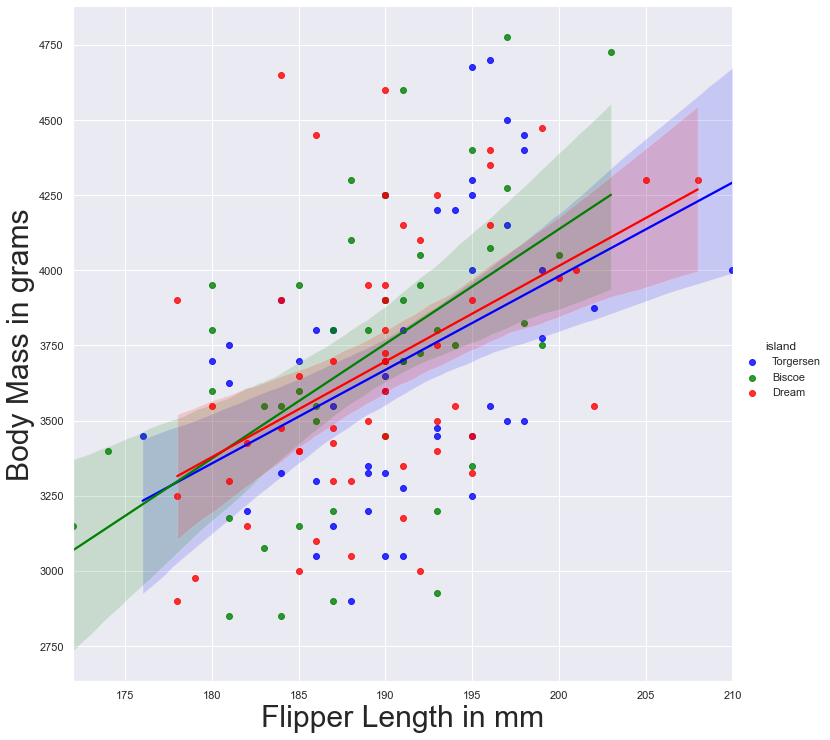

In [64]:
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="island",
               height=10,
               data=singlepenguin1,
               palette=['blue','green','red'])
g.set_xlabels('Flipper Length in mm', fontsize = 30)
g.set_ylabels('Body Mass in grams', fontsize = 30)


We will try the k nearest neighbors algorithm and asses it's capability.


In [ ]:
# creation of KNN neighbours field for prediciton

In [ ]:
# removing the incomplete data

In [92]:
penguins2 =penguins.dropna()

In [93]:
penguins2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [94]:
inputs = penguins2[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
output = penguins2[['species','sex','island']]

In [95]:
inputs

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


In [96]:
output.head()

,species,sex,island
0,Adelie,male,Torgersen
1,Adelie,female,Torgersen
2,Adelie,female,Torgersen
4,Adelie,female,Torgersen
5,Adelie,male,Torgersen


In [117]:
# using 5 for the comparison number
knn =nei.KNeighborsClassifier(n_neighbors=12)

In [118]:
# calling the knn fit
knn.fit(inputs, output)

KNeighborsClassifier(n_neighbors=12)

In [112]:
# retrieving penguin 300 for comparison
penguins2.loc[13]

species                 Adelie
island               Torgersen
bill_length_mm            38.6
bill_depth_mm             21.2
flipper_length_mm        191.0
body_mass_g             3800.0
sex                       male
year                      2007
Name: 13, dtype: object

In [119]:
knn.predict([[38.6,21.2,191.0,3800.0]])

array([['Adelie', 'male', 'Dream']], dtype=object)

### importing and chcking the iris data set

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [14]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


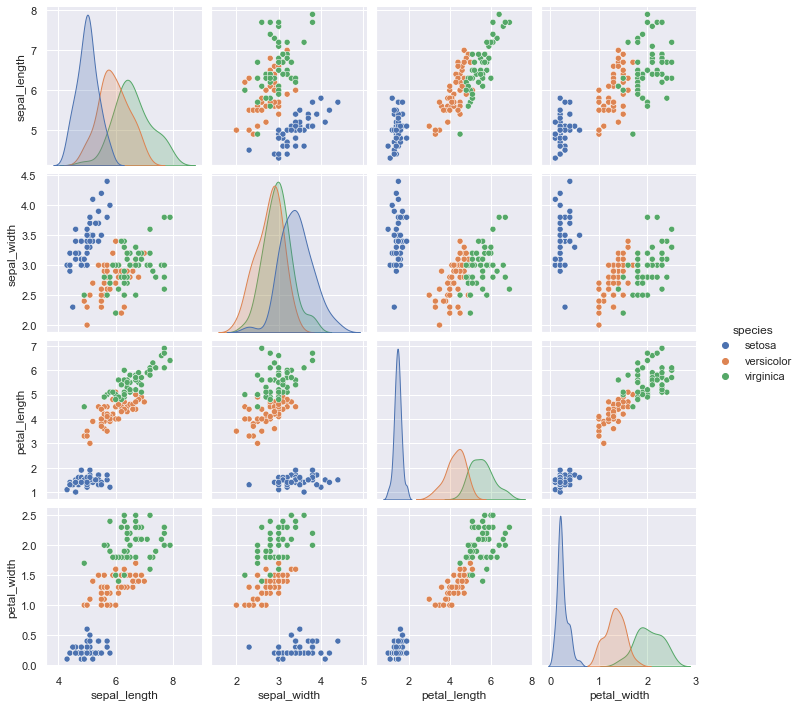

In [16]:
sns.pairplot(df,hue = 'species')

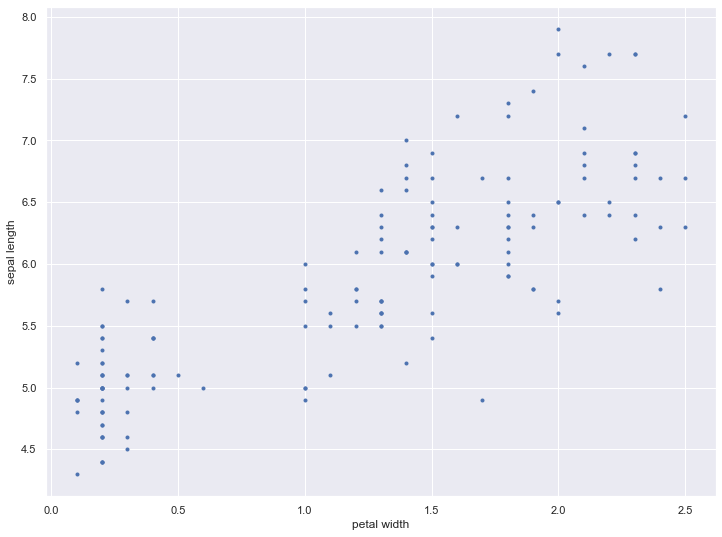

In [17]:
fig, ax = plt.subplots()
ax.plot(df['petal_width'],df['sepal_length'],'.')

ax.set_xlabel('petal width');
ax.set_ylabel('sepal length');

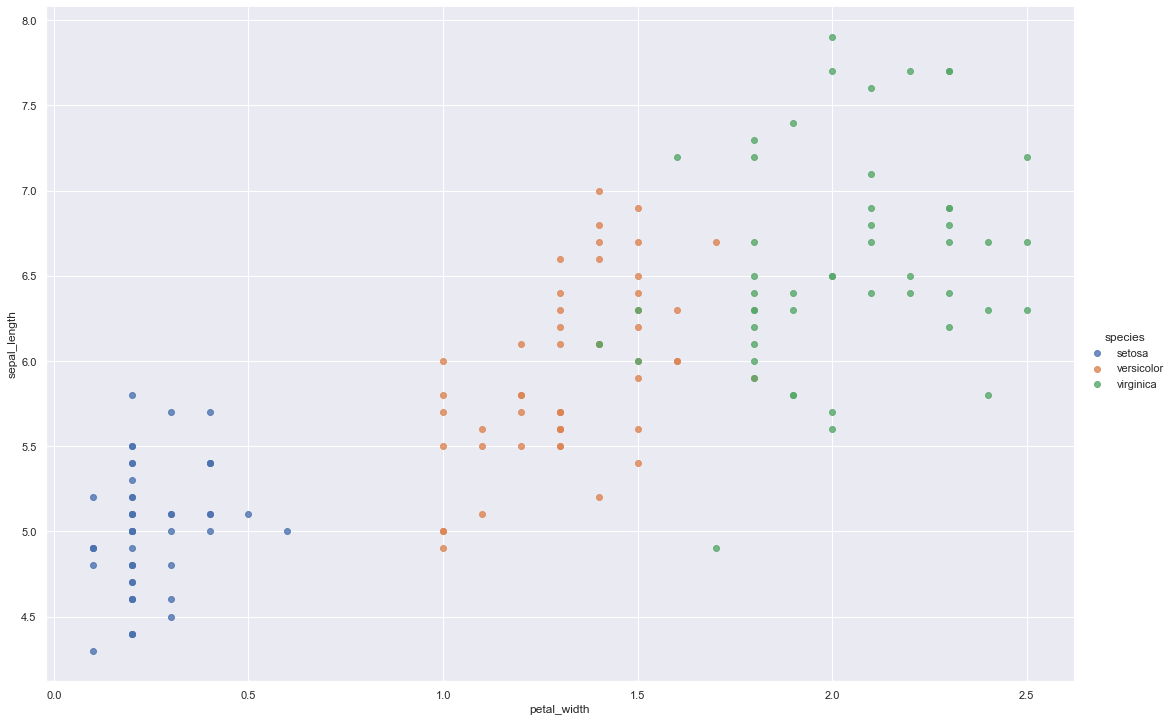

In [18]:
sns.lmplot(x="petal_width", y="sepal_length",hue='species',data=df,fit_reg=False,height=10,aspect=1.5)

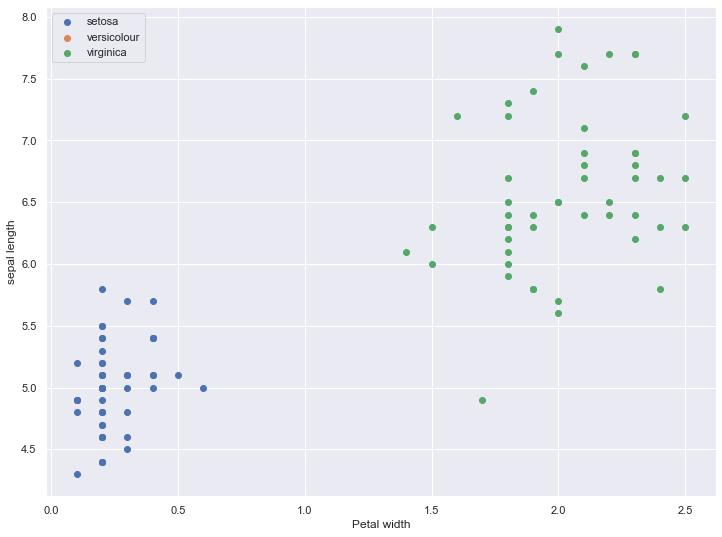

In [19]:
setos = df[df['species']=='setosa']
versi = df[df['species']=='versicolour']
virgi = df[df['species']=='virginica']

fig, ax =plt.subplots()

ax.scatter(setos['petal_width'],setos['sepal_length'],label='setosa')
ax.scatter(versi['petal_width'],versi['sepal_length'],label='versicolour')
ax.scatter(virgi['petal_width'],virgi['sepal_length'],label='virginica')

ax.set_xlabel('Petal width')
ax.set_ylabel('sepal length')
ax.legend();

In [20]:
df[df['species']=='virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


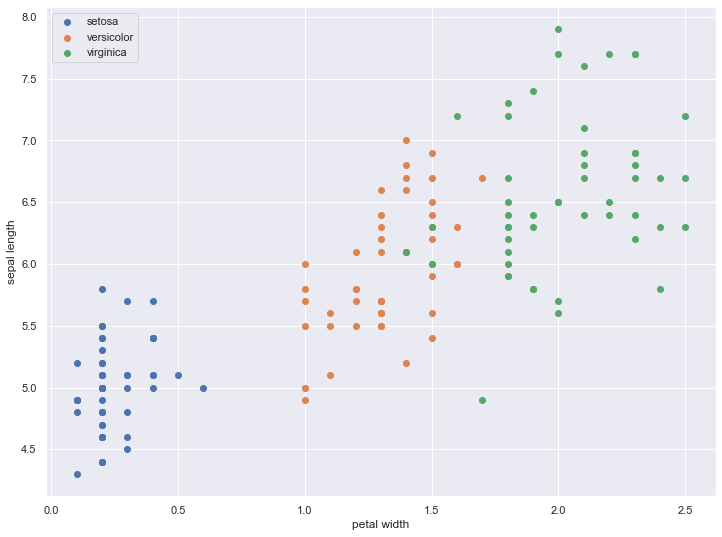

In [21]:
fig, ax =plt.subplots()

for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)
    
ax.set_xlabel('petal width')
ax.set_ylabel('sepal length')
ax.legend();

In [22]:
x= df.groupby('species')
x

In [23]:
x.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [24]:
y= df.groupby('sepal_length')

In [25]:
y.std()

,sepal_width,petal_length,petal_width
sepal_length,,,
4.3,NaN,NaN,NaN
4.4,0.152753,0.057735,0.000000
4.5,NaN,NaN,NaN
4.6,0.221736,0.221736,0.050000
4.7,0.000000,0.212132,0.000000
4.8,0.204939,0.204939,0.070711
4.9,0.326599,1.309071,0.671317
5.0,0.543241,0.834266,0.326769
5.1,0.411636,0.504425,0.282843


In [26]:
for i,j in (x+y):
    print()
    print(f"j is: '{i}'")
    print(f"j looks like:\n{j[0:3]}")
    print()

TypeError: unsupported operand type(s) for +: 'DataFrameGroupBy' and 'DataFrameGroupBy'